# Intervalos de Confiança

Neste notebook, vamos aprender a calcular intervalos de confiança.

## Uma breve introdução

Embora intervalos de confiança sejam amplamente usados, pode ser difícil entender seu conceito e quando devemos usá-lo. Então vamos a um exemplo:

Suponha que você queira saber qual a porcentagem de pessoas nos Brasil que amam futebol. Para obter uma resposta 100% correta a essa pergunta, você deveria perguntar a cada um dos 212 milhões habitantes se eles amam ou não futebol. Obviamente, não é viável falar com 212 milhões de pessoas.

Você poderia então obter uma amostra aleatória de brasileiros (falando com muito menos pessoas) para obter a porcentagem de pessoas que amam futebol nessa amostra. Contudo, assim não estaria 100% confiante de que esse número está certo ou quão longe esse número está da resposta real.

Você poderia tentar obter um intervalo, como: “Tenho 95% de certeza que a porcentagem de pessoas que amam futebol nos EUA está entre 58% e 62%”. É daí que vem o nome Intervalo de confiança, temos um intervalo e temos alguma confiança sobre ele.

## Como calcular intervalos de confiança

O cálculo do intervalo de confiança (ou CI, Confidence Interval) envolve a melhor estimativa obtida pela amostra (média ou mediana) e uma margem de erro. A margem de erro é calculada usando o Z-score para a confiança desejada multiplicada pelo desvio padrão amostral da média.


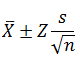




Em que image.png é a média amostral, Z é o valor de Z-score associado ao nível de confiança desejado, e image.png é o desvio padrão amostral da média.

Aqui estão os z-scores para os níveis de confiança mais comuns:

Confiança | Z

75%       | 1.15

90%       | 1.64

95%       | 1.96

99%       | 2.57

## Vamos ao código!

In [43]:
import pandas as pd
import numpy as np

## Base de dados
Para este exercício, vamos utilizar uma base de dados do site [basedosdados.org](https://basedosdados.org), uma organização colaborativa que cataloga e divulga dados públicos brasileiros. Vocês podem usar esse site para buscar bases para projetos acadêmicos, sempre que necessitarem. Outro exemplo de site de reúne bases abertas (nesse caso, americanas) é o [UCI](https://archive.ics.uci.edu/ml/index.php).

Vamos usar a base de "Indicadores de Mobilidade e Transportes em 2010" para analisar os dados sobre tempo médio de deslocamento casa-trabalho para o ano de 2010.

Para usar o arquivo, podemos usar duas opções: (1)  baixar o csv e importá-lo (usando pandas), ou (2) usar diretamente o pacote do basededados.

### Opção 1:
Baixar a tabela 'tempo_deslocamento_casa_trabalho' em https://basedosdados.org/dataset/br-mobilidados-indicadores, adicionar em Files (menu da esquerda) e importar com pandas

In [ ]:
df = pd.read_csv("")

### Opção 2:
Instalar o pacote basedosdados, e importar a base diretamente. Mais detalhes em: https://basedosdados.github.io/mais/access_data_packages/#primeiros-passos.

Vocês terão que criar um projeto em https://console.cloud.google.com/projectselector2/home/dashboard?pli=1 para pegar o billing_project_id (ID do projeto)

In [44]:
!pip install basedosdados
import basedosdados as bd
# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_mobilidados_indicadores',
            table_id='tempo_deslocamento_casa_trabalho',\
            billing_project_id='651717382049')#colocar aqui o ID do projeto do gcloud
            #billing_project_id='censo-331617')


Downloading: 100%|██████████| 229/229 [00:00<00:00, 1282.68rows/s]


In [45]:
df = bd.read_table(dataset_id='br_mobilidados_indicadores',
            table_id='tempo_deslocamento_casa_trabalho',
            billing_project_id='651717382049')


Downloading: 100%|██████████| 229/229 [00:00<00:00, 930.52rows/s]


Antes de começarmos a análise, é importante explorar se há valores faltantes.

In [46]:
df['tempo_medio_deslocamento'].isnull().sum()

0

In [47]:
df.head()

,ano,sigla_uf,id_municipio,tempo_medio_deslocamento,prop_deslocamento_acima_1_hora
0,2010,RO,1100205,28,7.0
1,2010,AC,1200401,26,5.0
2,2010,PA,1202400,21,3.0
3,2010,PA,1206500,25,7.0
4,2010,AM,1302603,41,17.0


Não há valores faltantes.

### Vamos calcular o intervalo de confiança para o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.

In [48]:
## Primeiro, vamos calcular a media e o o desvio padrao
media_mg = np.mean(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])
std_mg = np.std(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])

print('O tempo médio de deslocamento no estado de MG é de', \
      np.round(media_mg,2), 'e o desvio padrão é de', np.round(std_mg,2))

O tempo médio de deslocamento no estado de MG é de 33.95 e o desvio padrão é de 10.49


In [49]:
## Agora, voltando à tabela do Z-score, vemos que o valor de Z
##correspondente a um nível de confiança de 95% é de 1.96
## Assim, podemos calcular o intervalo de confiança:

z = 1.96
CI_inf_mg = media_mg - z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_mg = media_mg + z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))

In [50]:
print('(', np.round(CI_inf_mg,2), ',',np.round(CI_sup_mg,2), ')')

( 30.61 , 37.28 )


## Exercício 1

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de MG, considerando um nível de confiança de 90%?

In [58]:
# Dados
media_mg = np.mean(df.loc[df['sigla_uf'] == 'MG', 'tempo_medio_deslocamento'])
std_mg = np.std(df.loc[df['sigla_uf'] == 'MG', 'tempo_medio_deslocamento'])
n_mg = len(df.loc[df['sigla_uf'] == 'MG'])

# Nível de confiança de 90%
z = 1.64

# Cálculo do intervalo de confiança
CI_inf_mg = media_mg - z * (std_mg / np.sqrt(n_mg))
CI_sup_mg = media_mg + z * (std_mg / np.sqrt(n_mg))

# Exibição do resultado
print(np.round(CI_inf_mg, 2), 'a', np.round(CI_sup_mg, 2))


31.16 a 36.74


## Exercício 2

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [61]:
# Dados
media_sp = np.mean(df.loc[df['sigla_uf'] == 'SP', 'tempo_medio_deslocamento'])
std_sp = np.std(df.loc[df['sigla_uf'] == 'SP', 'tempo_medio_deslocamento'])
n_sp = len(df.loc[df['sigla_uf'] == 'SP'])

# Nível de confiança de 95%
z = 1.96

# Cálculo do intervalo de confiança
CI_inf_sp = media_sp - z * (std_sp / np.sqrt(n_sp))
CI_sup_sp = media_sp + z * (std_sp / np.sqrt(n_sp))
#print(CI_inf_sp)

# Exibição do resultado
print(np.round(CI_inf_sp, 3), 'a', np.round(CI_sup_sp, 2))


41.899 a 47.13


## Exercício 3

Qual é o CI do tempo **mediano** de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [65]:
from scipy import stats

# Dados
dados_sp = df.loc[df['sigla_uf'] == 'SP', 'tempo_medio_deslocamento']

# Nível de confiança de 95%
alpha = 0.05

# Cálculo do intervalo de confiança do mediano
mediana_sp = np.median(dados_sp)
lower_percentile = alpha / 2 * 100
upper_percentile = 100 - lower_percentile

CI_mediano_sp = np.percentile(dados_sp, [lower_percentile, upper_percentile])

# Exibição do resultado
print(np.round(CI_mediano_sp[0], 2), 'a', np.round(CI_mediano_sp[1], 3))


32.85 a 60.3


### Biblioteca scipy.stats

O módulo de funções estatísticas scipy stats nos permite calcular o CI chamando apenas uma função. Para maiores informações, ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

In [69]:
import scipy.stats as st
#Voltando ao problema inicial, vamos calcular o intervalo de confiança para
#o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.
#alpha = nivel de confiança
#loc = array dos dados para media
#scale = desvio padrão amostral da média

# Dados
dados_mg = df.loc[df['sigla_uf'] == 'MG', 'tempo_medio_deslocamento']

# Nível de confiança de 95%
confidence = 0.95

# Cálculo do intervalo de confiança
ci = st.norm.interval(confidence, loc=np.mean(dados_mg),
                      scale=st.sem(dados_mg, ddof=0, nan_policy='omit'))



In [70]:
np.round(ci,2)

array([30.61, 37.28])

## Exercício 4

Usando a biblioteca scipy.stats, calcule e imprima o CI do tempo médio de deslocamento para cada estado brasileiro, com nível de confiança de 99% .

In [71]:
#Dica: a função unique dá o array de todos os estados
df['sigla_uf'].unique()

array(['RO', 'AC', 'PA', 'AM', 'RR', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [72]:


# Obtenha a lista de todos os estados no DataFrame
estados = df['sigla_uf'].unique()

# Nível de confiança de 99%
confidence = 0.99

# Inicialize uma lista para armazenar os CIs
cis = []

# Loop através de cada estado e calcule o CI
for estado in estados:
    dados_estado = df.loc[df['sigla_uf'] == estado, 'tempo_medio_deslocamento']
    ci = st.norm.interval(confidence, loc=np.mean(dados_estado),
                          scale=st.sem(dados_estado, ddof=0, nan_policy='omit'))
    cis.append({'Estado': estado, 'CI': ci})

# Exibição dos resultados
for item in cis:
    print(f'Estado: {item["Estado"]}, CI: ({item["CI"][0]:.2f}, {item["CI"][1]:.2f})')


Estado: RO, CI: (nan, nan)
Estado: AC, CI: (nan, nan)
Estado: PA, CI: (25.98, 40.02)
Estado: AM, CI: (nan, nan)
Estado: RR, CI: (nan, nan)
Estado: AP, CI: (nan, nan)
Estado: TO, CI: (nan, nan)
Estado: MA, CI: (nan, nan)
Estado: PI, CI: (nan, nan)
Estado: CE, CI: (22.25, 29.01)
Estado: RN, CI: (nan, nan)
Estado: PB, CI: (nan, nan)
Estado: PE, CI: (34.31, 43.82)
Estado: AL, CI: (nan, nan)
Estado: SE, CI: (nan, nan)
Estado: BA, CI: (27.55, 35.06)
Estado: MG, CI: (29.56, 38.33)
Estado: ES, CI: (nan, nan)
Estado: RJ, CI: (39.85, 51.49)
Estado: SP, CI: (41.08, 47.95)
Estado: PR, CI: (29.20, 37.97)
Estado: SC, CI: (nan, nan)
Estado: RS, CI: (nan, nan)
Estado: MS, CI: (nan, nan)
Estado: MT, CI: (nan, nan)
Estado: GO, CI: (24.13, 36.13)
Estado: DF, CI: (nan, nan)


## Exercício 5
Se não há valores valores, por que a função retorna NA para alguns estados?

A função retorna NA em alguns estados devido ao fato de alguns estados não possui um tamanho de amostra suficientemente grande, aasim, não é possível calcular intervalos de confiança com precisão. Outra razão seria os dados terem muito valores semenhantes.

## Exercício 6

Crie uma visualização (a seu critério) para mostrar os intervalos de confiança dos estados com valores não nulos. Qual padrão você observa?

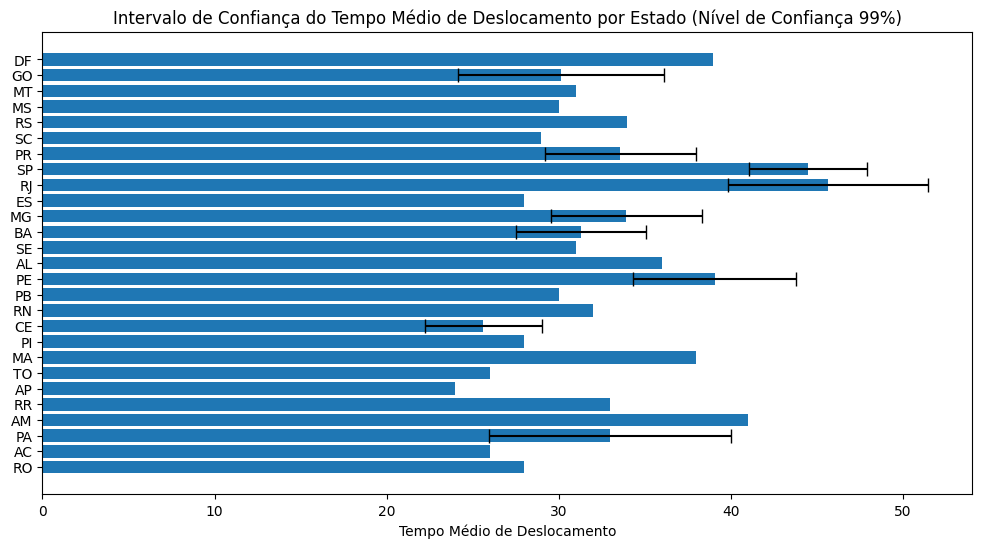

In [73]:
import matplotlib.pyplot as plt

# Filtrar estados com valores não nulos
estados_com_dados = [estado for estado in estados if not pd.isna(df.loc[df['sigla_uf'] == estado, 'tempo_medio_deslocamento']).all()]

# Criar uma lista de médias e intervalos de confiança para os estados com dados
medias = [np.mean(df.loc[df['sigla_uf'] == estado, 'tempo_medio_deslocamento']) for estado in estados_com_dados]
cis = [st.norm.interval(confidence, loc=np.mean(df.loc[df['sigla_uf'] == estado, 'tempo_medio_deslocamento']),
                        scale=st.sem(df.loc[df['sigla_uf'] == estado, 'tempo_medio_deslocamento'], ddof=0, nan_policy='omit')) for estado in estados_com_dados]

# Separar os limites inferiores e superiores dos intervalos de confiança
ci_inf = [ci[0] for ci in cis]
ci_sup = [ci[1] for ci in cis]

# Criar listas separadas para as barras de erro inferior e superior
x = medias
xerr_lower = [medias[i] - ci_inf[i] for i in range(len(estados_com_dados))]
xerr_upper = [ci_sup[i] - medias[i] for i in range(len(estados_com_dados))]

# Criar um gráfico de barras com barras de erro
plt.figure(figsize=(12, 6))
plt.barh(estados_com_dados, x, xerr=[xerr_lower, xerr_upper], capsize=5)
plt.xlabel('Tempo Médio de Deslocamento')
plt.title('Intervalo de Confiança do Tempo Médio de Deslocamento por Estado (Nível de Confiança 99%)')

plt.show()


O gráfico acima mostra as variações regionais do tempo, poe exemplo o sudeste tem o tempo médio de deslocamento maior que norte e nordeste, principalmente, pela presença dos estados de São Paulo e Rio de Janeiro. Outra fato importante de ser lembrado é o intervalo de confiança que em estados como São Paulo e Minas Gerais, os dois mais populosos, apresentam um intervalo de confiança mais estreitos em comparação com outros estados, o que sugere uma uniformidade do deslocamento nesses estados.